#      <center> COVID-19 Data Analysis </center>

### <center> Singhealth Singapore General Hospital Take Home Exercise </center>
### <center> Ng Guangren, Ryan </center>

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn.metrics.pairwise import nan_euclidean_distances

import sqlite3


In [303]:
df = pd.read_csv(r"Data.csv")

# Data Exploration and preprocessing


In [304]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

Turning object type features into string helps in narrowing down the scope. For example numbers cannot be placed in a string feature. It also allows data type specific operations.[<sup>1</sup>](https://towardsdatascience.com/why-we-need-to-use-pandas-new-string-dtype-instead-of-object-for-textual-data-6fd419842e24)

In [305]:
object_to_string = {
    'Entity': 'string',
    'Continent': 'string',
}

df = df.astype(object_to_string)
# df["Date"] = pd.to_datetime(df.Date) # I have problems with insertion with this datatype


In [306]:
df.describe().round(2)


,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.00,38472.00,38472.00,38472.00,38472.00,38472.00,3.847200e+04,38472.00,38472.00,30577.00,38218.00,34862.00
mean,23.74,20.21,17.72,3.17,2.09,19002.33,4.896983e+07,32.75,10.66,39440.59,287902.66,8090.50
std,26.06,61.07,8.13,2.56,1.52,22271.11,1.427251e+08,8.47,6.77,150184.66,1405242.87,29548.75
min,-40.90,-106.35,-2.00,0.20,0.02,411.60,3.412840e+05,16.00,1.00,-239172.00,1.00,1.00
25%,8.62,-3.44,11.00,1.40,0.82,3659.00,4.793900e+06,27.00,5.00,1505.00,2074.00,77.00
50%,27.51,21.82,20.00,2.50,1.89,8821.80,1.148464e+07,32.00,8.00,5520.00,21431.00,527.00
75%,45.94,47.48,25.00,4.49,3.21,25946.20,4.286296e+07,41.00,16.00,20382.00,137377.00,3480.50
max,64.96,179.41,29.00,13.05,7.52,114704.60,1.339180e+09,48.00,28.00,2945871.00,28605669.00,513091.00


In [307]:
df = df.round(3)
df


,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38467,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-26,NaN,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.70,0.08,1464.0,16529904,19,3,2021-02-27,NaN,36058.0,1463.0


The feature `Entity`'s name is a little too generalised. I will consider them as countries as it is synonmous as sovereign states. 

In [308]:
df.Entity.unique()


<StringArray>
[             'Albania',              'Algeria',            'Argentina',
              'Armenia',            'Australia',              'Austria',
              'Bahrain',           'Bangladesh',              'Belarus',
              'Belgium',
 ...
               'Turkey',               'Uganda',              'Ukraine',
 'United Arab Emirates',       'United Kingdom',        'United States',
              'Uruguay',              'Vietnam',               'Zambia',
             'Zimbabwe']
Length: 104, dtype: string

Renamed serveral features to more appropriate names.

In [309]:
df.rename({"Entity": "Country", "GDP/Capita": "GDP per capita", "Continent":"Region"},
          inplace=True, axis=1)

Region based on UN Statistical Division.[<sup>2</sup>](https://unstats.un.org/unsd/methodology/m49/overview/) There should be smarter way of doing this by downloading certain dataset encapculating geographical region and combining with the main dataset.

In [382]:
unsd = pd.read_csv("unsd.csv")
unsd = unsd[["Region Name","Sub-region Name","Intermediate Region Name",'Country or Area']]
unsd.rename({"Country or Area":"Country"},inplace=True,axis=1)
unsd.loc[unsd["Sub-region Name"]=="Sub-Saharan Africa",["Sub-region Name"]] = unsd[unsd["Sub-region Name"]=="Sub-Saharan Africa"]["Intermediate Region Name"]
unsd.loc[unsd["Sub-region Name"]=="Latin America and the Caribbean",["Sub-region Name"]] = unsd[unsd["Sub-region Name"]=="Latin America and the Caribbean"]["Intermediate Region Name"]
unsd.drop(inplace=True,axis=1,labels=["Region Name","Intermediate Region Name"])
unsd.rename({"Sub-region Name":"Region"},inplace=True,axis=1)

for i, row in enumerate(df.values):
    t = unsd[unsd.Country == row[0]].Region
    df.iloc[i,1] = t.values[0]

In [384]:
df.Region.unique()

<StringArray>
[          'Southern Europe',           'Northern Africa',
             'South America',              'Western Asia',
 'Australia and New Zealand',            'Western Europe',
             'Southern Asia',            'Eastern Europe',
          'Northern America',            'Western Africa',
           'Central America',                 'Caribbean',
           'Northern Europe',            'Eastern Africa',
                 'Melanesia',        'South-eastern Asia',
              'Eastern Asia',              'Central Asia',
           'Southern Africa',                         '/']
Length: 20, dtype: string

### Null checking and imputation

In [291]:
df.isnull().sum()

Country                               0
Region                                0
Latitude                              0
Longitude                             0
Average temperature per year          0
Hospital beds per 1000 people         0
Medical doctors per 1000 people       0
GDP per capita                        0
Population                            0
Median age                            0
Population aged 65 and over (%)       0
Date                                  0
Daily tests                        7895
Cases                               254
Deaths                             3610
dtype: int64

After grouping by country, each country has at least one numerical value so calculating mean doesn't not return null.

In [292]:
df.groupby('Country').mean()[["Daily tests", "Cases", "Deaths"]].isnull().any()


Daily tests    False
Cases          False
Deaths         False
dtype: bool

`sklearn.KNNImputer` is used as it is more rombust than `bfill`,`ffill` and `sklearn.SimpleImputer` of various strategies (mean,median,constant and etc).  
  
`nan_euclidean_distances` function is used to estimate number of neighbours to be used.[<sup>3</sup>](https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/)


In [293]:
d = []

for name, group in df.groupby('Country'):
    l = list(filter(lambda x: x > 0, sorted(nan_euclidean_distances(group[["Daily tests","Cases","Deaths"]])[0])))
    if len(l) ==0: continue
    d.append(int(l[0]))

avg = sum(d)/len(d)
avg

6.875

In [294]:
for name, group in df.groupby('Country'):
    l = list(filter(lambda x: x > 0, sorted(nan_euclidean_distances(group[["Daily tests","Cases","Deaths"]])[0])))
    num = avg if len(l)==0 else int(l[0])
    imputer = KNNImputer(n_neighbors=num)
    df.loc[df.Country==name,["Daily tests","Cases","Deaths"]] = imputer.fit_transform(X=group[["Daily tests","Cases","Deaths"]])
    
df.isnull().any()[lambda x: x == True]

Series([], dtype: bool)

## Statistical description of the data

# Sqlite3 Setup, creations and insertions

In [295]:
from datetime import datetime

con = sqlite3.connect("db.db", detect_types=sqlite3.PARSE_DECLTYPES |
                      sqlite3.PARSE_COLNAMES)
cur = con.cursor()
cur.execute('''
DROP TABLE IF EXISTS covid19_country_data;
''')
cur.execute('''
CREATE TABLE IF NOT EXISTS covid19_country_data(
    id INTEGER PRIMARY KEY NOT NULL,
    country TEXT NOT NULL,
    continent TEXT NOT NULL,
    latitude REAL NOT NULL,
    longitude REAL NOT NULL,
    average_temperature_per_year INTEGER NOT NULL,
    hospital_beds_per_1000_people REAL NOT NULL,
    medical_doctors_per_1000_people REAL NOT NULL,
    gdp_per_capita REAL NOT NULL,
    population INTEGER NOT NULL,
    median_age INTEGER NOT NULL,
    population_aged_65_and_above_in_percentage INTEGER NOT NULL,
    date TEXT NOT NULL,
    daily_tests REAL NOT NULL,
    cases REAL NOT NULL,
    deaths REAL NOT NULL
);
''')

df.reset_index(inplace=True)
cur.executemany('''
INSERT INTO covid19_country_data VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);
''',df.values)
con.commit()


In [296]:
t =cur.execute('''SELECT country,continent,
latitude,longitude,average_temperature_per_year,hospital_beds_per_1000_people,medical_doctors_per_1000_people,gdp_per_capita,population,median_age,population_aged_65_and_above_in_percentage,daily_tests,cases,deaths 
FROM covid19_country_data''')

df = pd.DataFrame(t.fetchall(),columns= ["country","continent","latitude","longitude","average temperature/year","hospital beds/1000 people","doctors/1000 people","gdp/capita","population","median_age","population>65 (%)","daily tests","cases","deaths" ])


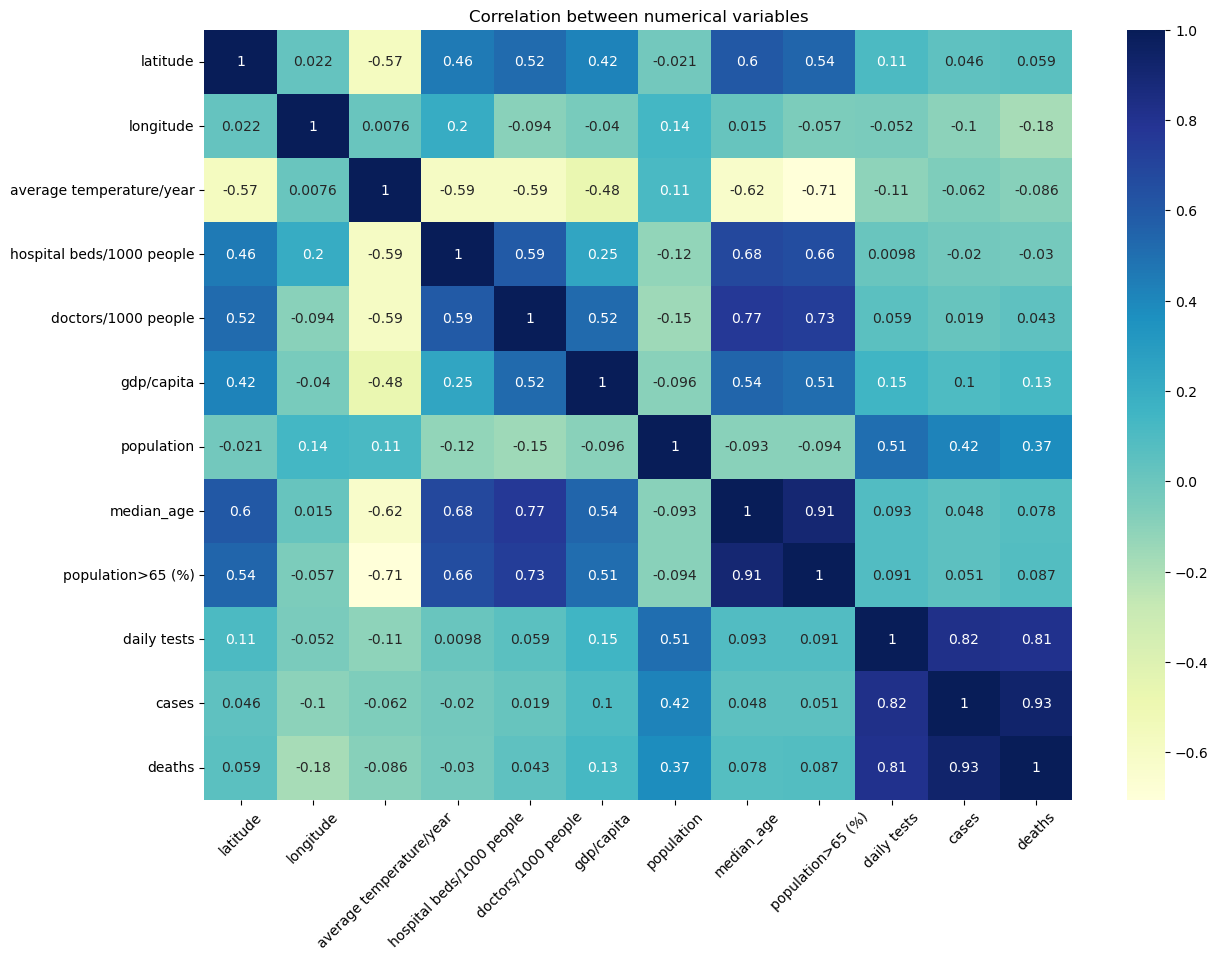

In [297]:
plt.figure(figsize=(14,10))
plt.title("Correlation between numerical variables")
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.YlGnBu)
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.pairplot(df,
x_vars=['average temperature/year',
'hospital beds/1000 people',
'medical doctors/1000 people',
'daily tests',
'cases',
'deaths'],
kind = 'reg') # warning: about 3 minutes render

In [298]:
t =cur.execute('''SELECT date,cases,country,continent
FROM covid19_country_data''')

df = pd.DataFrame(t.fetchall(),columns= ["date","cases","country","continent" ])
df.date = pd.to_datetime(df.date)


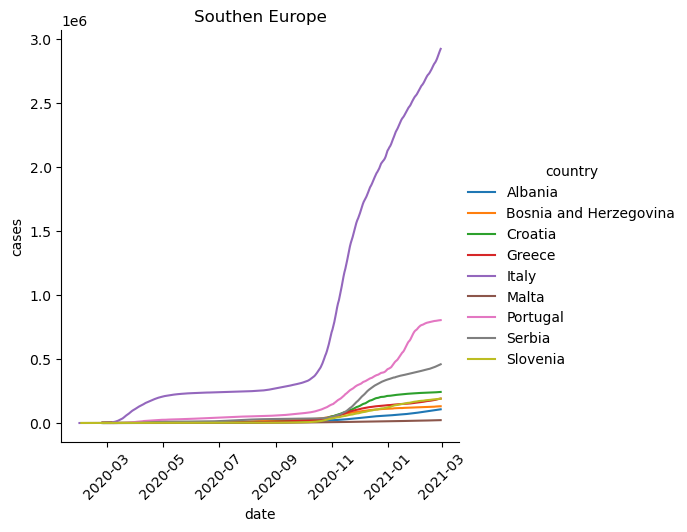

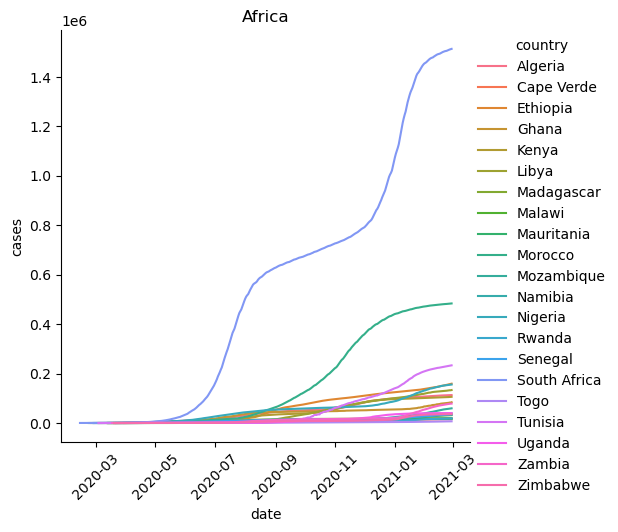

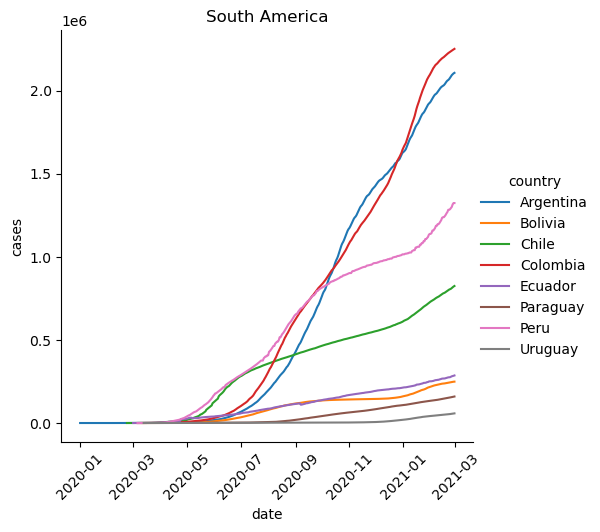

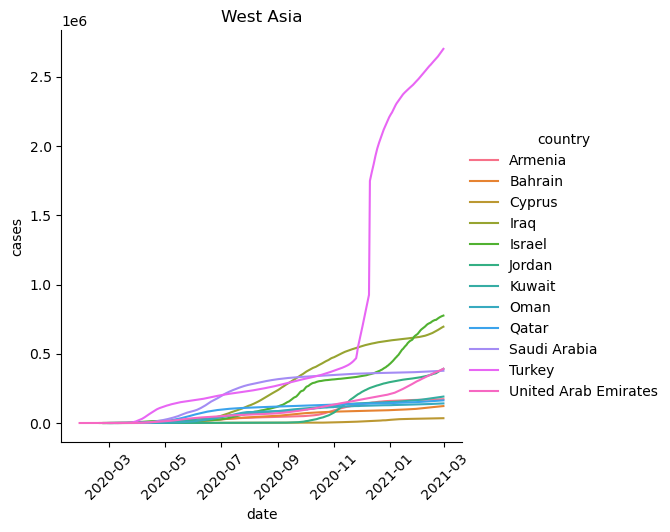

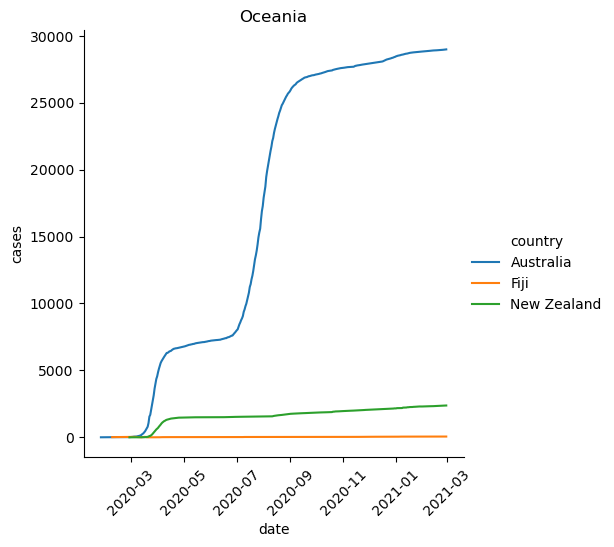

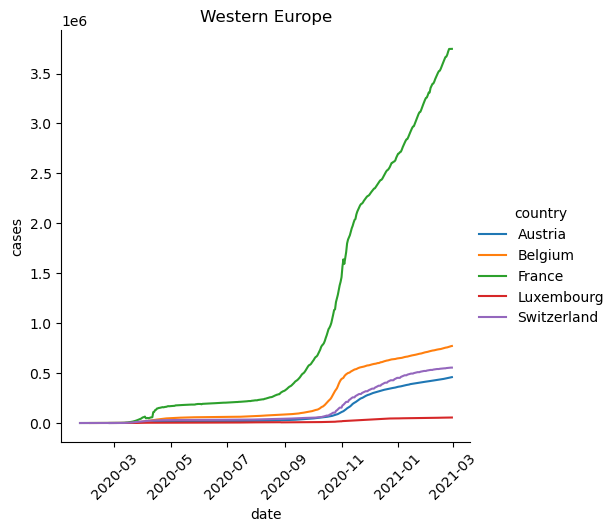

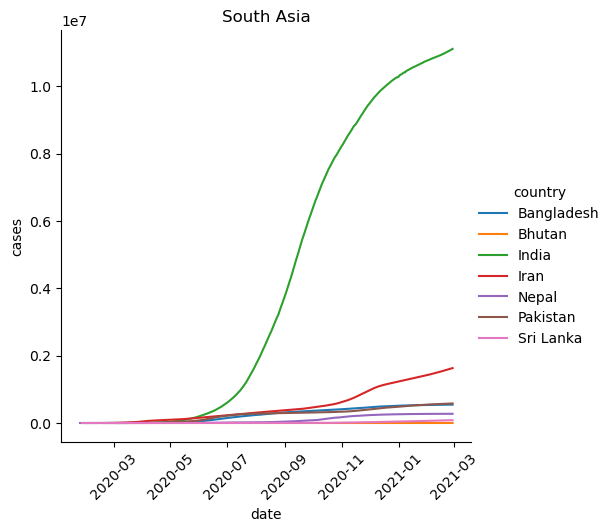

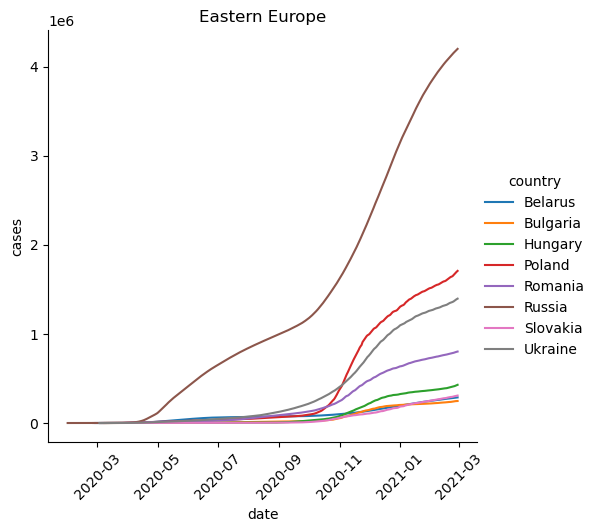

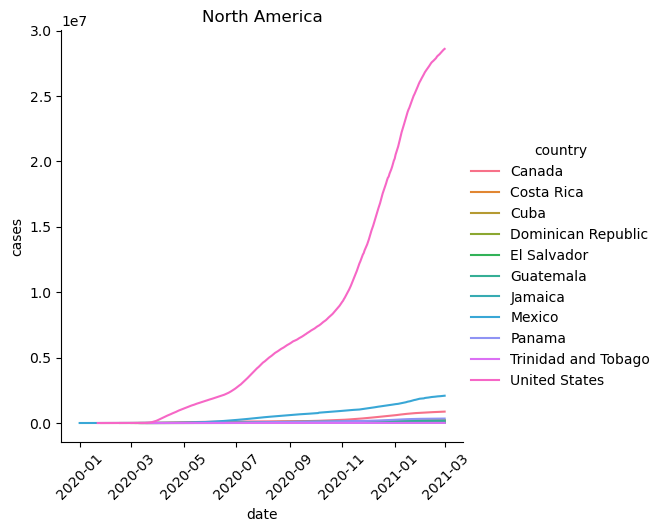

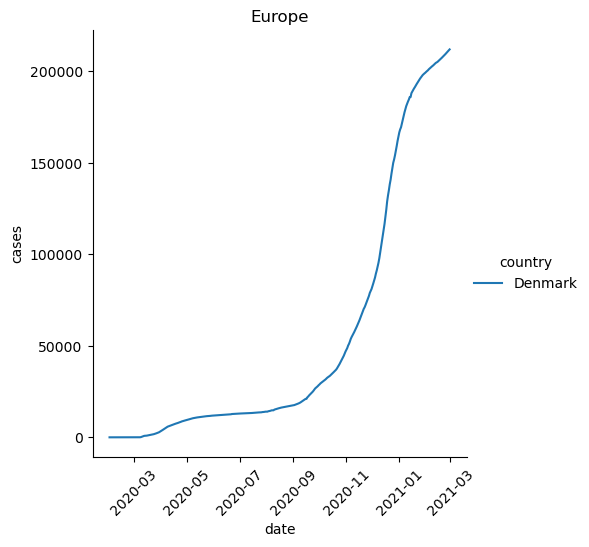

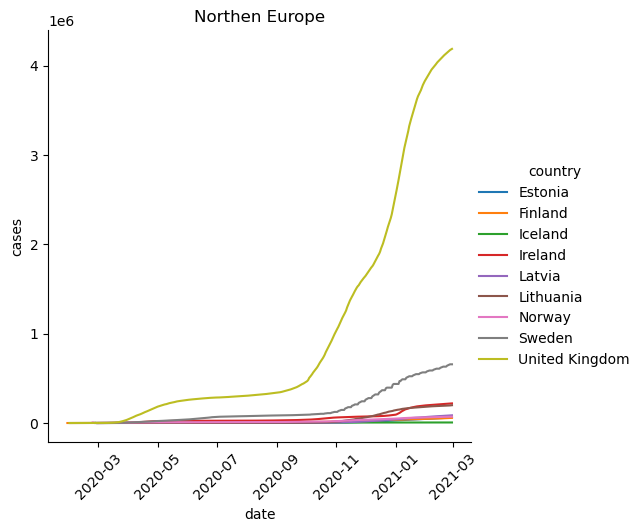

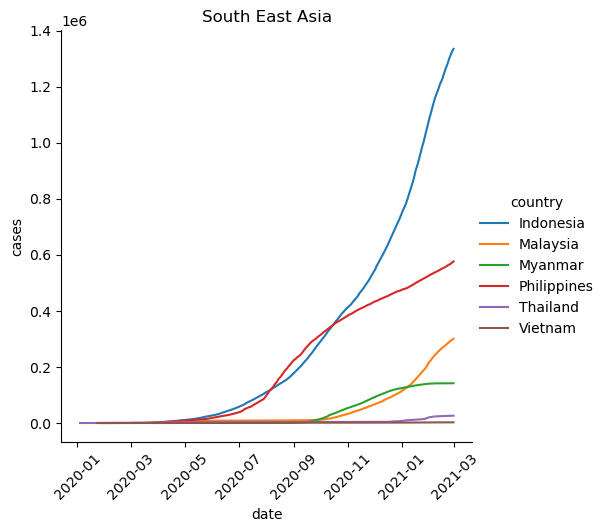

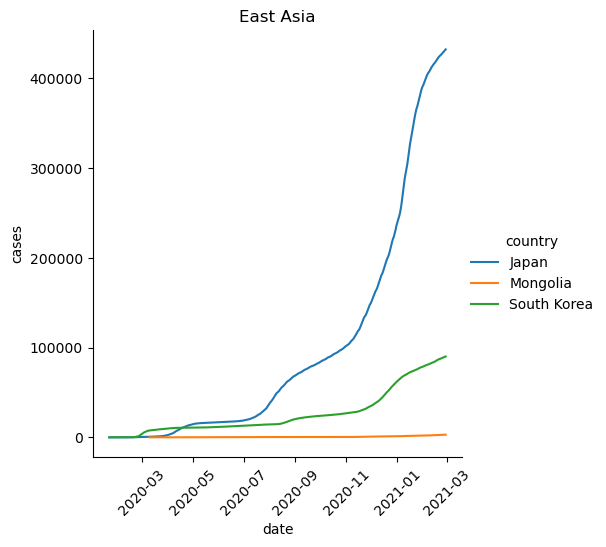

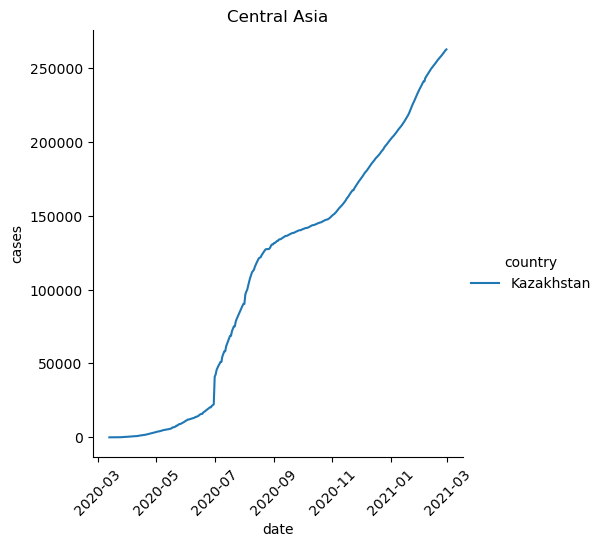

In [299]:
for continent in df.continent.unique():
    sns.relplot(data=df[df.continent==continent],x="date",y="cases",hue="country",kind="line")
    plt.title(continent)
    plt.xticks(rotation=45)
    plt.show()

# Close Conneciton

In [300]:
cur.close()
con.close()